In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
%config Completer.use_jedi = False
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

## Read in the 2-D dataset

In [2]:
import scipy.io
mat = scipy.io.loadmat('data/ex8data1.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X_train = np.array(mat['X'])
X_train.shape

(307, 2)

In [5]:
X_val = np.array(mat['Xval'])
X_val.shape

(307, 2)

In [6]:
y_val = np.array(mat['yval'])
y_val.shape

(307, 1)

## Training

### Parameter Estimation

In [7]:
# estimate the mean 
mu = np.mean(X_train,axis = 0)

# estimate the covariance
sigma = np.cov(X_train.T,bias = True)

In [8]:
mu

array([14.11222578, 14.99771051])

In [9]:
sigma

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

### Density Estimation

In [10]:
## estimate the Gaussian pdf
def p_x(x,mu,sigma):
    return multivariate_normal.pdf(X_train[i,:], mean=mu, cov= sigma)

## Cross-validation and Threshold selection

In [11]:
p_xs_val = []
for i in range(X_val.shape[0]):
    p_xs_val.append(p_x(X_val[i,:], mu, sigma))

In [12]:
f1s = []
epsilons = np.linspace(min(p_xs_val), max(p_xs_val),10000)
for epsilon in epsilons:
    y_preds = (p_xs_val < epsilon).astype(int)
    f1s.append(f1_score(y_val,y_preds, average = 'macro'))

thresh = epsilons[np.argmax(f1s)]

print('Best F1-score at thresh = {}, is {}'.format(thresh, np.max(f1s)))   

Best F1-score at thresh = 2.7186401253193168e-05, is 0.8974958263772955


####  Plot Outliers

In [13]:
X_val_df = pd.DataFrame(X_val)

In [14]:
X_val_df.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


<AxesSubplot:xlabel='0', ylabel='1'>

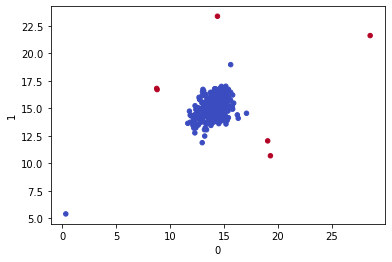

In [15]:
X_val_df.plot.scatter(x = 0, y = 1, c = (p_xs_val<thresh).astype(int), cmap = 'coolwarm', colorbar = False)